# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

it s a clustering algorithm that groups together data points  that are closely packed, marking points in low-density regions 
as outliers or noise,it is a density based clusterig method widely used for its ability to handle data with complex cluster shapes and noise

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler  #
from sklearn.metrics import silhouette_score  # silhouette_score is a metric used to eveluate the quality of a clustering algorithm result
                                              # it is used to eveluate how well data points in cluster are grouped together      

In [3]:
# Load the dataset
iris = sns.load_dataset('iris')

# Extract numerical features
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
# Apply DBSCAN   
dbscan = DBSCAN(eps=0.5, min_samples=5)  #esp defines the radius  of the neighbourhood around a datapoint within a radius , large eps=compact cluster
dbscan.fit(X_scaled)                     # min_sample= species the min number of points required to form a dense region

# Extract cluster labels
labels = dbscan.labels_

# Add cluster labels to the dataset
iris['cluster'] = labels


In [5]:
# Print cluster information
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Silhouette Score (if there are more than one cluster)
if n_clusters > 1:
    silhouette = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score: {silhouette}")
else:
    print("Silhouette Score cannot be calculated with one cluster.")


Number of clusters: 2
Number of noise points: 34
Silhouette Score: 0.35651648142700726


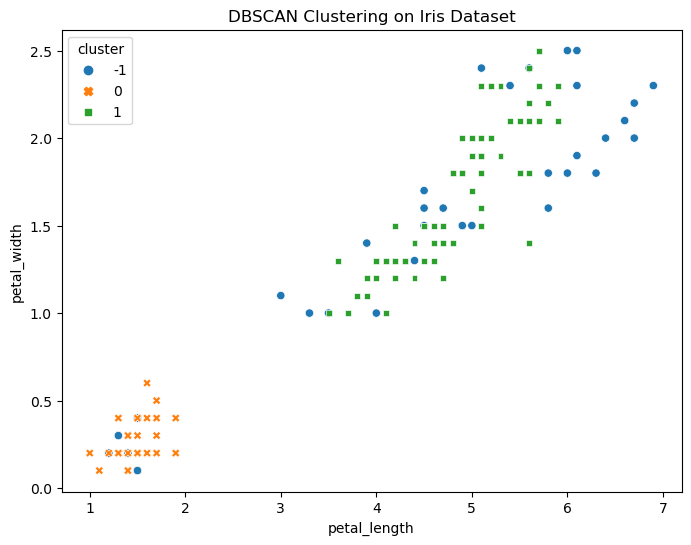

In [6]:
# Plot the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='petal_length', y='petal_width', hue='cluster', data=iris, palette='tab10', style='cluster')
plt.title('DBSCAN Clustering on Iris Dataset')
plt.show()
# +1 = the point is well matched to its own cluster and poorly to other clustering (good clustering)
# 0= the point is on border between two cluster
# -1=  the points may be assigned to the wrong cluster(poor clustering)

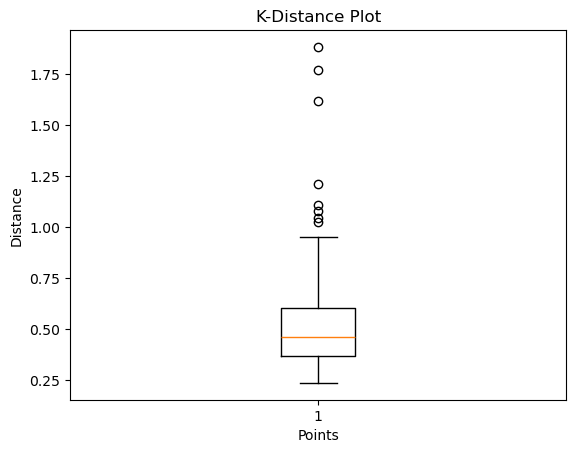

In [9]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, -1])  # Sort by distance to 5th nearest neighbor
plt.boxplot(distances)
plt.title('K-Distance Plot')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()


# Great JOB

In [ ]:
2 dimension 
p1(3,2) p2(4,2) 
Eucliden Distence= √(x2-x1)² + (y2-y1)²
(4-3)²=1